## 1. Importing libraries

In [13]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
%matplotlib inline
# For loading .arff files
from scipy.io import arff
# To analyze the type of missing data
import missingno as msno
#tsne
from sklearn.manifold import TSNE
#visulize
from matplotlib import pyplot as plt
#deal with missing data
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import Imputer


<b>Dataset Link:</b>The Dataset can be found at [Polish bankruptcy dataset](https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data)

In [14]:
############################################################
# Loads the 5 raw .arff files into a list
def load_arff_raw_data():
    N=5
    return [arff.loadarff('data/' + str(i+1) + 'year.arff') for i in range(N)]

############################################################
# Loads the 5 raw .arff files into pandas dataframes
def load_dataframes():
    return [pd.DataFrame(data_i_year[0]) for data_i_year in load_arff_raw_data()]

############################################################
# Set the column headers from X1 ... X64 and the class label as Y, for all the 5 dataframes.
def set_new_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes[0].columns)-1)]
    cols.append('Y')
    for df in dataframes:
        df.columns = cols

############################################################
# dataframes is the list of pandas dataframes for the 5 year datafiles.  
dataframes = load_dataframes()

# Set the new headers for the dataframes. The new headers will have the renamed set of feature (X1 to X64)
set_new_headers(dataframes)    

# print the first 5 rows of a dataset 'year1'
dataframes[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [15]:
# Convert the dtypes of all the columns (other than the class label columns) to float.
def convert_columns_type_float(dfs):
    for i in range(5):
        index = 1
        while(index<=63):
            colname = dfs[i].columns[index]
            col = getattr(dfs[i], colname)
            dfs[i][colname] = col.astype(float)
            index+=1
            
convert_columns_type_float(dataframes)            

In [16]:
# The class labels for all the dataframes are originally in object type.
# Convert them to int types
def convert_class_label_type_int(dfs):
    for i in range(len(dfs)):
        col = getattr(dfs[i], 'Y')
        dfs[i]['Y'] = col.astype(int)
        
convert_class_label_type_int(dataframes)

In [30]:
def drop_nan_rows(dataframes, verbose=False): 
    clean_dataframes = [df.dropna(axis=0, how='any') for df in dataframes] 
    if verbose: 
            for i in range(len(dataframes)): 
                totaldata=len(dataframes[i]) 
                cleandata=len(clean_dataframes[i]) 
                rate=(totaldata-cleandata)/totaldata
    return clean_dataframes

nan_dropped_dataframes = drop_nan_rows(dataframes, verbose=True)



In [31]:
### data discription for unbalanced data
def unbalanced_data_stat(dataframes,verbose=False):
    #dealling with the imbalance data
    for i in range(len(dataframes)):
        data= dataframes[i]
        #calculate the class 0 and class 1
        class0 = data[data['Y'].isin([0])]
        class1= data[data['Y'].isin([1])]
    #over-sampling to SMOTE and ADASYN and using t-sne to visualize it compared with original one
        X = data.iloc[:,0:64]  #independent columns
        y = data.iloc[:,64] 
        print('dataset '+str(i)+' Original dataset class 1 {}'.format(y.tolist().count(1)))
        print('dataset '+str(i)+' Original dataset class 0 {}'.format(y.tolist().count(0)))
        


unbalanced_data_stat(dataframes)



dataset 0 Original dataset class 1 271
dataset 0 Original dataset class 0 6756
dataset 1 Original dataset class 1 400
dataset 1 Original dataset class 0 9773
dataset 2 Original dataset class 1 495
dataset 2 Original dataset class 0 10008
dataset 3 Original dataset class 1 515
dataset 3 Original dataset class 0 9277
dataset 4 Original dataset class 1 410
dataset 4 Original dataset class 0 5500


here


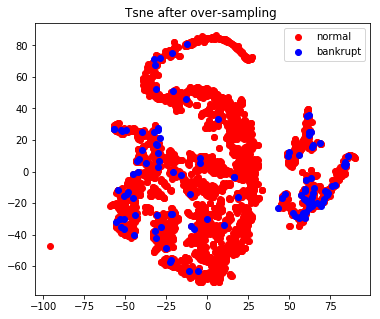

In [32]:
### using t-sne to visualize the cleaning data
def tsne(x,y):
        i=4
        datax=x
        datay=y
        tsne=TSNE(n_components=2,random_state=0)
        x_2d=tsne.fit_transform(datax)
        target_length=range(len(datax))
        plt.figure(figsize=(6,5))
        colors='r','b'
        label='normal','bankrupt'
        label2="Tsne after over-sampling "
        for i,c,label in zip(target_length,colors,label):
            plt.scatter(x_2d[datay==i,0],x_2d[datay==i,1],c=c,label=label)
        plt.legend()
        plt.title(label2)
        plt.show()
        

datax=nan_dropped_dataframes[3].iloc[:,0:64]
datay=nan_dropped_dataframes[3].iloc[:,64]
tsne(datax,datay) 




In [71]:
### using mean to replace the missing data
def perform_mean_imputation(dfs):
    # Construct an imputer with strategy as 'mean', to mean-impute along the columns
    #imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    mean_imputed_dfs = [pd.DataFrame(imputer.fit_transform(df)) for df in dfs]
    for i in range(len(dfs)):
        mean_imputed_dfs[i].columns = dfs[i].columns   
    return mean_imputed_dfs

mean_imputed_dataframes = perform_mean_imputation(dataframes)
#mean_imputed_dataframes[2].head()
#datay=mean_imputed_dataframes[2].iloc[:,64]


In [72]:
from sklearn.ensemble import ExtraTreesClassifier

    tree-based feature selection                  
The 0 feature's score is:  0.011521323006702035
The 1 feature's score is:  0.01385615883390281
The 2 feature's score is:  0.014219067080916978
The 3 feature's score is:  0.012076702142138115
The 4 feature's score is:  0.01218884743378157
The 5 feature's score is:  0.013095355510150156
The 6 feature's score is:  0.010617727203823046
The 7 feature's score is:  0.014018904629930384
The 8 feature's score is:  0.016642610754424345
The 9 feature's score is:  0.015597732577345308
The 10 feature's score is:  0.01384256109534684
The 11 feature's score is:  0.012593646992006508
The 12 feature's score is:  0.010609586576161106
The 13 feature's score is:  0.012695120815718141
The 14 feature's score is:  0.019151456409015565
The 15 feature's score is:  0.01125607628530544
The 16 feature's score is:  0.013949066334369039
The 17 feature's score is:  0.012907805023200731
The 18 feature's score is:  0.011651442801008152
The 19 feature's score is:  0.01

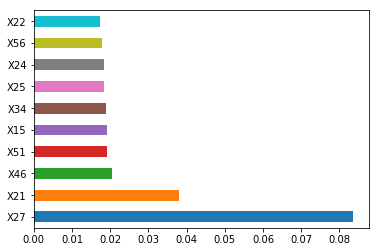

In [73]:
### dataset 3 feature selection feature 37 has largest missing data 
###using three ways to select the top 10 features
# method one univariate selection cannot be used because has negtive feature
# feature extraction
data = mean_imputed_dataframes[2]
X = data.iloc[:,0:64]  #independent columns
y = data.iloc[:,64]    #target column i.e price range
model = ExtraTreesClassifier()
model.fit(X, y)
array=model.feature_importances_
print("    tree-based feature selection                  ")
for i in range(len(array)):
    print("The "+str(i)+" feature's score is: ",array[i])
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

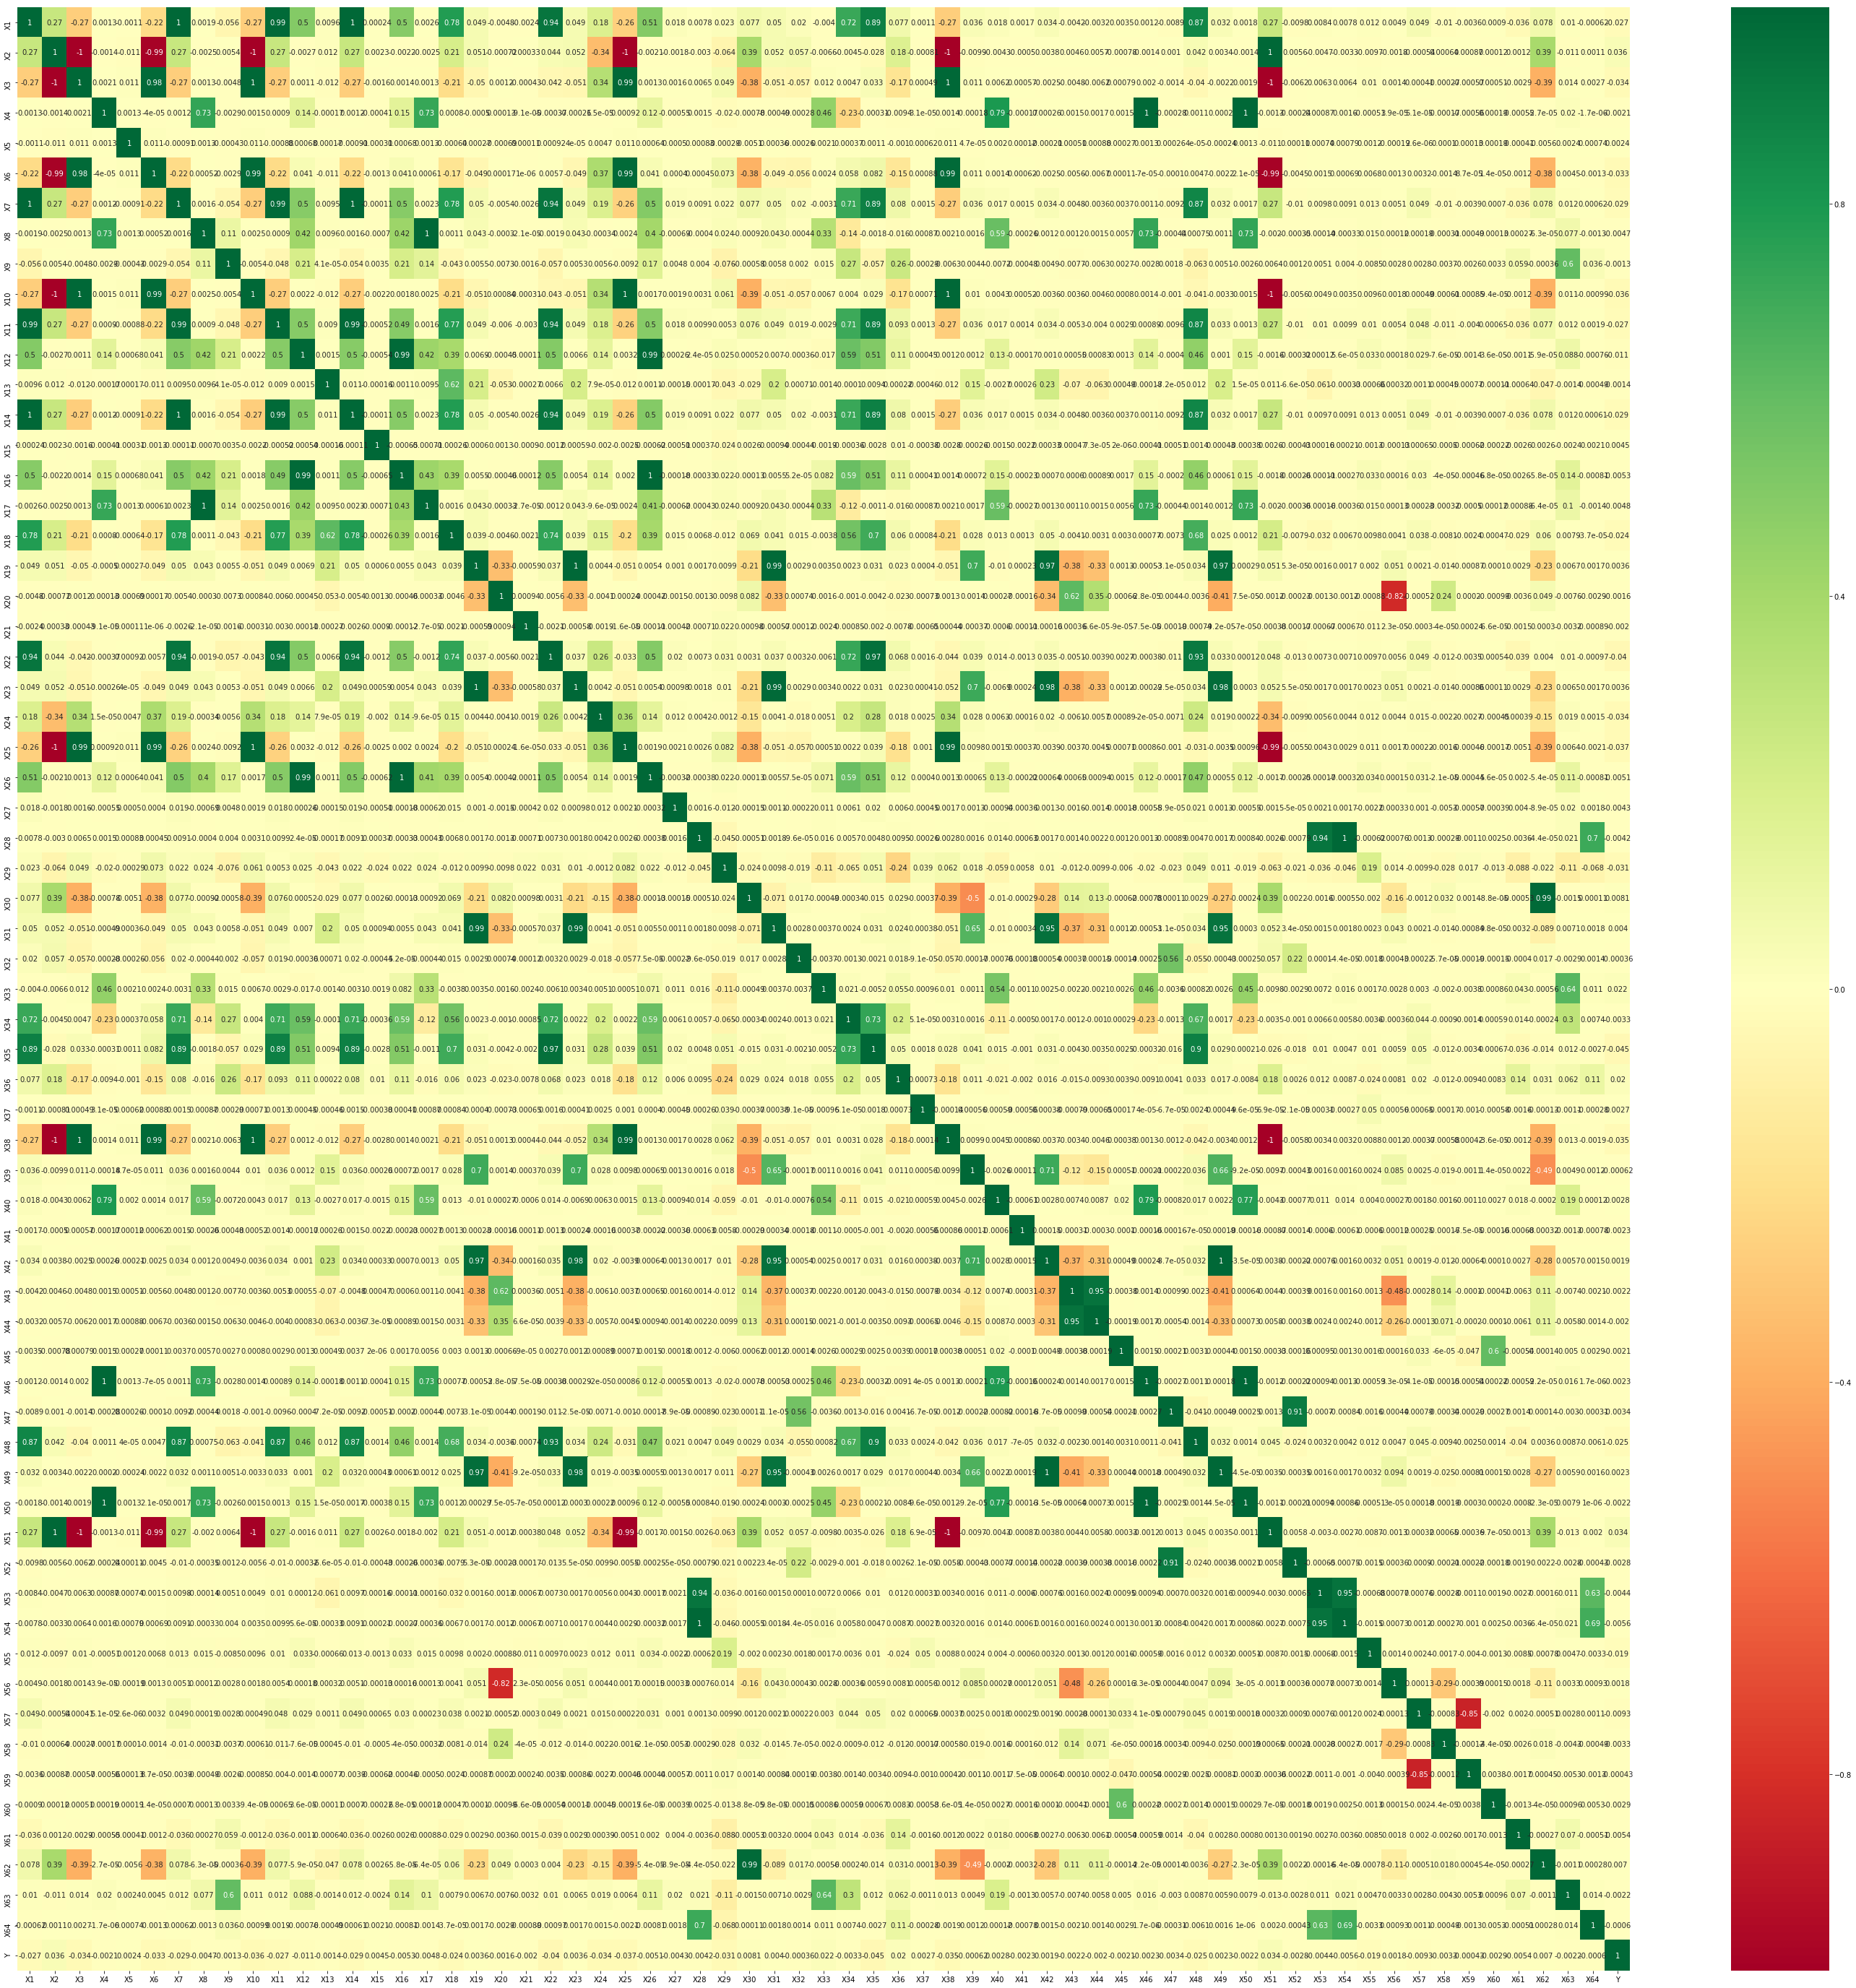

In [51]:
#correlation map with heated map

import pandas as pd
import numpy as np
import seaborn as sns
data = mean_imputed_dataframes[2]
X = data.iloc[:,0:64]  #independent columns
y = data.iloc[:,64]  
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [74]:
import collections
from imblearn.over_sampling import SMOTE, ADASYN

#dealling with the imbalance data
data= mean_imputed_dataframes[2]
#calculate the class 0 and class 1
class0 = data[data['Y'].isin([0])]
print
class1= data[data['Y'].isin([1])]
#over-sampling to SMOTE and ADASYN and using t-sne to visualize it compared with original one
X = data.iloc[:,0:64]  #independent columns
y = data.iloc[:,64] 
print('Original dataset class 1 {}'.format(y.tolist().count(1)))
print('Original dataset class 0 {}'.format(y.tolist().count(0)))
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_sample(X, y)
print('Resampled dataset class 1 using SMOTE {}'.format(y_resampled.tolist().count(1)))
print('Resampled dataset class 0 using SMOTE {}'.format(y_resampled.tolist().count(0)))
X_resampled1, y_resampled1= ADASYN().fit_sample(X, y)
print('Resampled dataset class 1 using ADASYN {}'.format(y_resampled1.tolist().count(1)))
print('Resampled dataset class 0 using ADASYN {}'.format(y_resampled1.tolist().count(0)))



Original dataset class 1 495
Original dataset class 0 10008
Resampled dataset class 1 using SMOTE 10008
Resampled dataset class 0 using SMOTE 10008
Resampled dataset class 1 using ADASYN 10087
Resampled dataset class 0 using ADASYN 10008


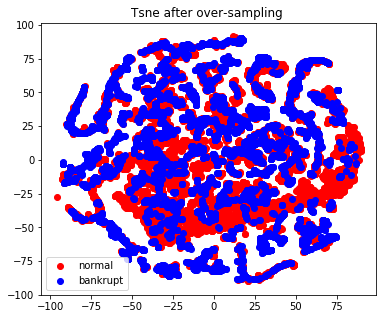

In [76]:
def tsne(x,y):
        i=4
        datax=x
        datay=y
        tsne=TSNE(n_components=2,random_state=0)
        x_2d=tsne.fit_transform(datax)
        target_length=range(len(datax))
        plt.figure(figsize=(6,5))
        colors='r','b'
        label='normal','bankrupt'
        label2="Tsne after over-sampling "
        for i,c,label in zip(target_length,colors,label):
            plt.scatter(x_2d[datay==i,0],x_2d[datay==i,1],c=c,label=label)
        plt.legend()
        plt.title(label2)
        plt.show()
        
        
tsne(X_resampled,y_resampled) 


In [146]:
# Utility Function to convert the arrays of features and labels to pandas dataframes, and then join them.
# Also re-assign the columns headers.
def restructure_arrays_to_dataframes(feature_arrays, label_arrays):
    resampled_dfs = []
    feature_df = pd.DataFrame(data=feature_arrays)
    label_df = pd.DataFrame(data=label_arrays)
    # Must set the column header for label_df, otherwise it wont join with feature_df, as columns overlap (with col names '0')
    label_df.columns=['Y'] 
    resampled_dfs.append(feature_df.join(label_df))
    # re-assign the column headers for features and labels    
    set_new_headers(resampled_dfs)    
    return resampled_dfs

balanced_dataset=restructure_arrays_to_dataframes(X_resampled,y_resampled)

data = balanced_dataset
data[0].head()

#after feature selection
x=data[0].iloc[:,[13,28]]
y = data[0].iloc[:,64]

a=np.mean(x)

data_input = np.array(x)
data_output = np.array(y)

In [147]:
# separate the class after feature selection using index
def SeperateClass(y):
    class0 = []
    class1 = []
    for i in range(len(y)):
        if y[i] == 0.0:
            class0.append(i)
        else:
            class1.append(i)
    return class0, class1

index0,index1=SeperateClass(data_output)


The covariance for class0 is:
 [[0.39  0.014]
 [0.014 0.707]] 
 The covariance for class1 is:
 [[0.445 0.012]
 [0.012 0.581]]


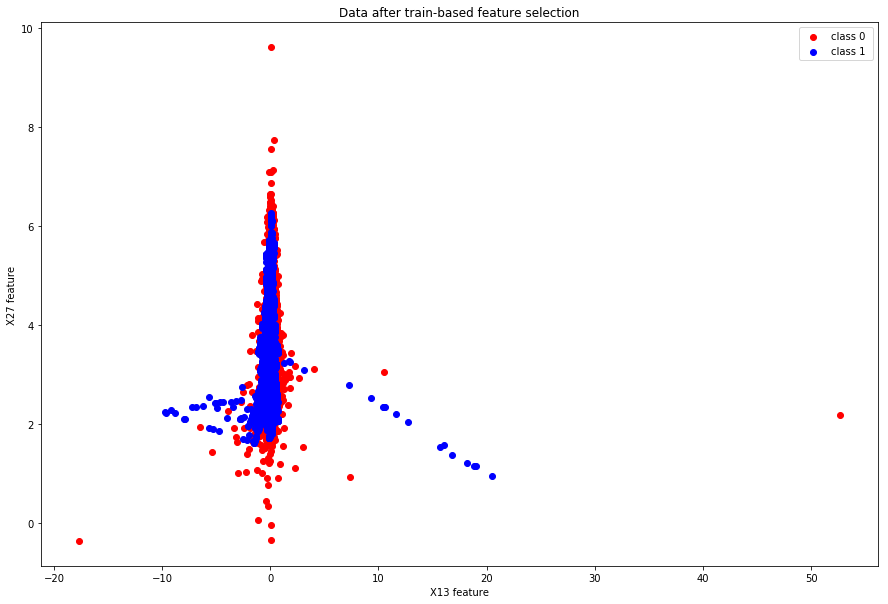

In [148]:
# plot the class after feature selection and covariance
class0 = data_input[index0,:]
class1 =data_input[index1,:]
print("The covariance for class0 is:\n", np.round(np.cov(class0.T),3),"\n","The covariance for class1 is:\n",np.round(np.cov(class1.T),3))
plt.figure(figsize=(15,10))
plt.scatter(class0[:,0],class0[:,1],c='r',label = 'class 0')
plt.scatter(class1[:,0],class1[:,1],c='b',label = 'class 1 ')
plt.legend()
plt.title('Data after train-based feature selection')
plt.xlabel('X13 feature')
plt.ylabel('X27 feature')
plt.show()

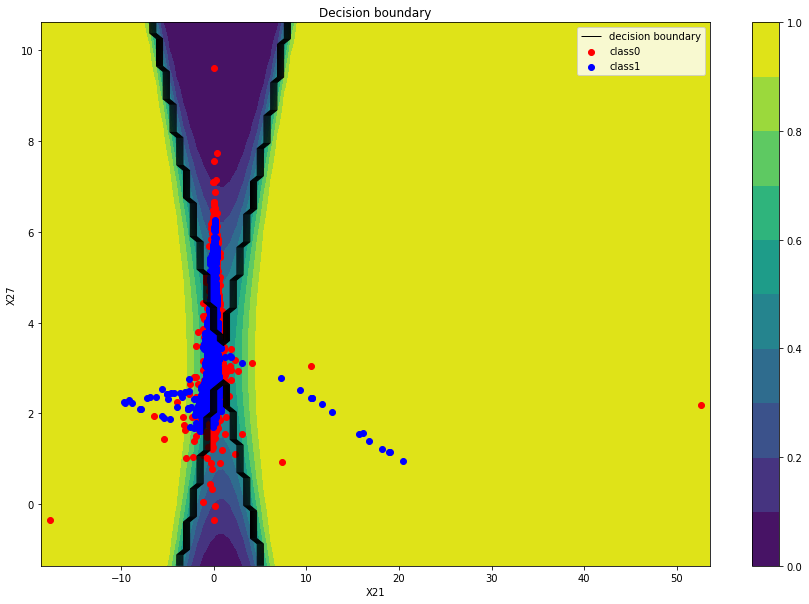

In [149]:
#train model :
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

def plotDecision2DBoundary(X_train, y_train):
    x = np.linspace(np.min(X_train[:,0])-1,np.max(X_train[:,0])+1,num= 100)
    y = np.linspace(np.min(X_train[:,1])-1,np.max(X_train[:,1])+1,num= 100)
    X,Y = np.meshgrid(x,y)
    X = np.reshape(X,[10000,1])
    Y = np.reshape(Y,[10000,1])
    coordinate = np.hstack((X,Y))
    clr = GaussianNB()
    clr.fit(X_train,y_train)
    y_pred = clr.predict(coordinate)
    y_prob = clr.predict_proba(coordinate)[:,1]
    y_pred = np.reshape(y_pred,[100,100])
    y_prob = np.reshape(y_prob,[100,100])
    plt.figure(figsize=(15,10))
    contf = plt.contourf(x,y,y_prob,[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    cont = plt.contour(x,y,y_pred,colors='k',linewidths=1)
    cont.collections[0].set_label('decision boundary')
    plt.scatter(class0[:,0],class0[:,1],c='r',label = 'class0')
    plt.scatter(class1[:,0],class1[:,1],c='b',label = 'class1')
    plt.colorbar(contf)
    plt.legend()
    plt.title('Decision boundary')
    plt.xlabel('X21')
    plt.ylabel('X27')
    plt.show()
    
plotDecision2DBoundary(data_input,data_output)

[[0.63881696 0.36118304]
 [0.54899854 0.45100146]
 [0.52965804 0.47034196]
 ...
 [0.46267238 0.53732762]
 [0.50651259 0.49348741]
 [0.53291689 0.46708311]]


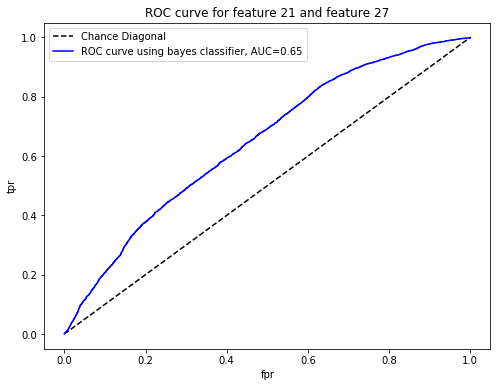

In [150]:
from sklearn.metrics import roc_curve
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

def plotROC(X_train,y_train):
    clr = LogisticRegression()
    clr.fit(X_train,y_train)
    y_pred = clr.predict(X_train)
    y_prob = clr.predict_proba(X_train)
    print(y_prob)
    fpr,tpr,threshold = roc_curve(y_train,y_prob[:,1],pos_label=1)
    plt.figure(figsize=(8,6))
    plt.plot([0,1],[0,1],'--k',label= 'Chance Diagonal')
    auc=np.round(metrics.auc(fpr,tpr),2)
    plt.plot(fpr,tpr,'b',label='ROC curve using bayes classifier, AUC='+ str(auc))
    plt.legend()
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve for feature 21 and feature 27')
    plt.show()


plotROC(data_input,data_output)


In [152]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix
def CrossValidationClassifier(model,X,y,num_fold=5):
    ColorMap = ['r','g','b','y','#FF00FF']
    error = 0
    kf = KFold(n_splits=num_fold,shuffle=True)
    plt.figure(figsize=(8,6))
    plt.plot([0,1],[0,1],'--k',label= 'Chance Diagonal')    
    index  = 0
    cm_sum = np.zeros((2,2))
    for train_index, test_index in kf.split(X):
        X_train,X_test = X[train_index],X[test_index]
        y_train,y_test = y[train_index],y[test_index]
        model.fit(X_train,y_train)
        y_prob = model.predict_proba(X_test)[:,1]
        y_pred = model.predict(X_test)
        fpr,tpr,threshold = roc_curve(y_test,y_prob,pos_label=1)
        plt.plot(fpr,tpr,ColorMap[index],label = ('ROC curve for folder'+str(index+1) + 'AUC = ' + str(roc_auc_score(y_test,y_prob).round(3))))
        index = index + 1
        cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
        cm_sum += cm
        error = error + (cm[0,1] + cm[1,0])/np.sum(cm)
    plt.legend()
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve feature 13,27 (Average error rate is ' + str((error/num_fold*100).round(3))+'%)')
    plt.savefig('Cross Validation')
    return cm_sum/5

array([[ 992.2, 1009.4],
       [ 820.4, 1181.2]])

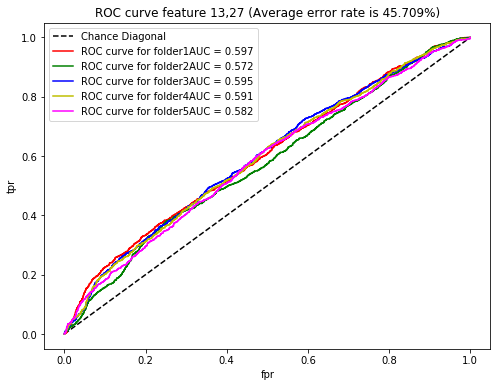

In [153]:
model = GaussianNB()
CrossValidationClassifier(model,data_input,data_output)

In [60]:
from sklearn.metrics import confusion_matrix

def printConfusionMatrix(X_train,y_train,class_weight=None):
    clr = GaussianNB()
    clr.fit(X_train,y_train)
    y_pred = clr.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    sns.heatmap(cm,annot=True,fmt="d",xticklabels=['non-bankrupcy','bankrupcy'],yticklabels=['non-bankrupcy','bankrupcy'])
    plt.title('Confusion Matrix Error rate is {:.2f}%'.format((cm[1,0]+cm[0,1])/(np.sum(cm))*100))
    plt.savefig('Heat_map_ince' if class_weight==None else 'Heat_map_ince_with_weight')

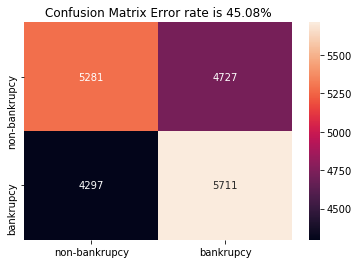

In [61]:
printConfusionMatrix(data_input,data_output.astype(int))

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_resampled)
data_input = std.transform(X_resampled)

pca = PCA(n_components=2)
pca.fit(data_input)
data_input_pca = pca.transform(data_input)

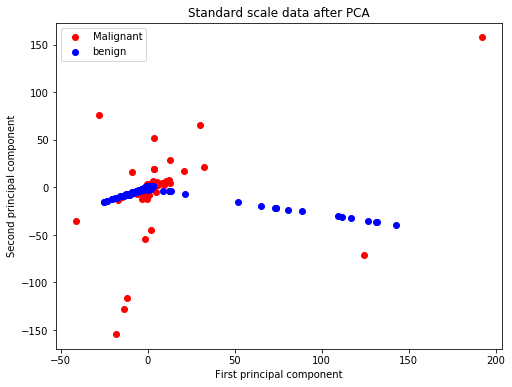

In [36]:
class0 = data_input_pca[index0,:]
class1 = data_input_pca[index1,:]
plt.figure(figsize=(8,6))
plt.scatter(class0[:,0],class0[:,1],c='r',label = 'Malignant')
plt.scatter(class1[:,0],class1[:,1],c='b',label = 'benign')
plt.legend()
plt.title('Standard scale data after PCA')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.savefig('Standard Data after PCA')
plt.show()

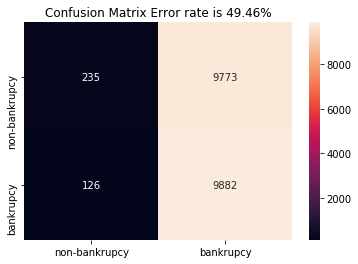

In [40]:
printConfusionMatrix(data_input_pca,data_output.astype(int))